In [3]:
suppressPackageStartupMessages(library(randomForest))
library(tree)
library(ISLR)
library(rpart)
suppressPackageStartupMessages(library(tidyverse))
library(rpart.plot)
library(party)
library(gmodels) 
suppressPackageStartupMessages(library(caret))
library(ggplot2)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich

Attaching package: ‘strucchange’

The following object is masked from ‘package:stringr’:

    boundary



In [4]:
setwd("/samba/Shared/ModeloFuga/data")

In [5]:
datos <- read.table("DS14.csv", sep = ";", header = TRUE)

In [6]:
datostest <- read.table("DS201807.csv", sep = ";", header = TRUE)

In [ ]:
summary(datos$FP)

In [ ]:
datosPart = datosPart %>%filter(DESAF == "NO")

In [ ]:
datosPart$DESAF = droplevels(datosPart$DESAF)

In [ ]:
summary(datosPart$DESAF)
table(datosPart$DESAF_FUT,datosPart$FP)

In [ ]:
summary(datosPart$DESAF)
table(datosPart$DESAF_FUT,datosPart$FP)

In [8]:
#Particionar data para generar una base de testeo (80-20)
inBuild <- createDataPartition(y = datosPart$DESAF, p = 0.8, list = FALSE)
datos.train <- datosPart[inBuild,]
datos.test <- datosPart[-inBuild,]

In [ ]:
summary(datos.test$DESAF)
table(datos.test$DESAF,datos.test$FP)

In [9]:
#Balanceo data de entrenamiento
datos.train.b = downSample(datos.train[,!colnames(datos.train)=="DESAF"], datos.train$DESAF, list = FALSE, yname = "DESAF")

In [ ]:
summary(datos.train.b$DESAF)
table(datos.train.b$DESAF,datos.train.b$FP)

In [ ]:
summary(datos.train.b$DESAF_FUT)
table(datos.train.b$DESAF_FUT,datos.train.b$FP)

In [10]:
#RandomForest
modelo = randomForest(DESAF~TIPO_PLAN+BENEF+RANGO_PACTADO+
                        PACT_BENEF+TIPIFICACION+PERMANENCIA_BENEFICIOS+MESES_RESTANTES_ANUALIDAD+
                        SEGMENTO+
                        SEGMENTO_COMPLETO+
                        ENTRADAS_SUC_3M+
                        TIPO_TRABAJADOR+RENTA+MAX_CONTACTABILIDAD+ISAPRE_ORIGEN+CON_COMPLEMENTOS+
                        NUMERO_COMPLEMENTOS+SEXO+
                        SINIESTRALIDAD+TIPO_CONTRATO+
                        EDAD,
                        data = datos.train.b, ntree=500, mtry=6, replace=T,na.action = na.omit
                      )

,MeanDecreaseGini
TIPO_PLAN,1568.8883
BENEF,840.0163
RANGO_PACTADO,1925.0750
PACT_BENEF,9138.1668
TIPIFICACION,575.5643
PERMANENCIA_BENEFICIOS,8993.5789
MESES_RESTANTES_ANUALIDAD,4394.3677
SEGMENTO,368.7214
SEGMENTO_COMPLETO,1719.0779
ENTRADAS_SUC_3M,3290.9451


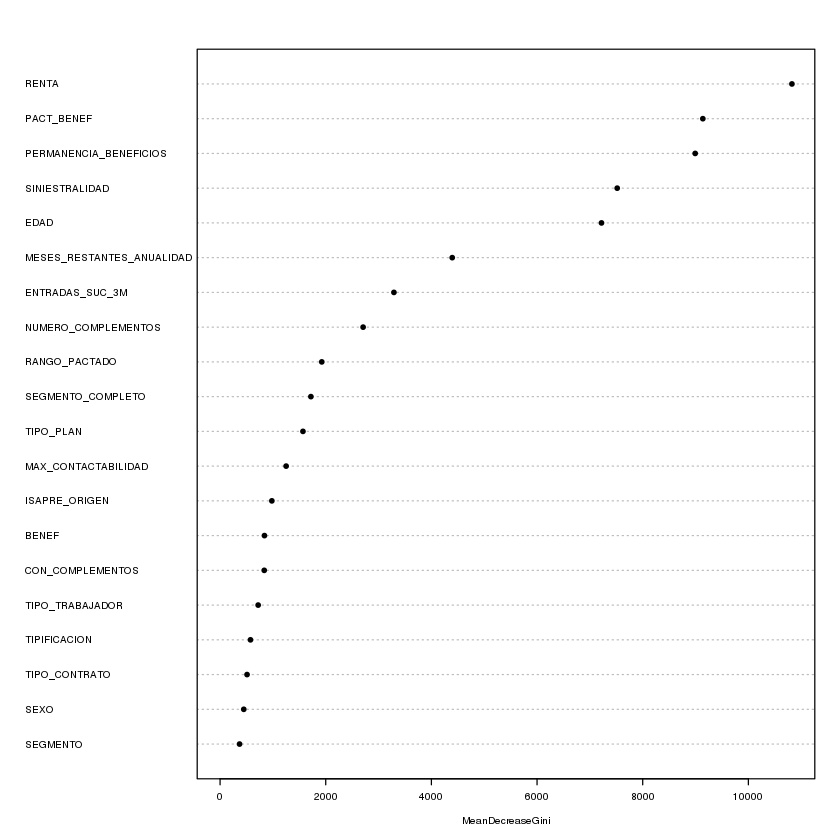

In [11]:
#Importancia de variables en modelo
importance(modelo)
varImpPlot(modelo, type=2, pch=19, col=1, cex=.5, main="")  #grafica importancia de variables

In [ ]:
table(datos.test$TIPIFICACION)

In [13]:
#Base de testeo nueva de ser requerida
datos.test <- read.table("DS201807.csv", sep = ";", header = TRUE)

In [ ]:
summary(datos.test)

In [12]:
#Predicción con probabilidades (corte dado)
Prediccion     <- predict(modelo,datos.train,type="p")
#Matriz de confusión
MC             <-table(datos.train[, "DESAF"],Prediccion[,"SI"] > .7);MC
Precision     <-((MC[2,2])/(MC[2,2]+MC[1,2]))*100;Precision
exactitud     <-(MC[2,2]+MC[1,1])/(MC[2,2]+MC[1,2]+MC[1,1]+MC[2,1])*100;exactitud
Recall       <-(MC[2,2]/(MC[2,2]+MC[2,1]))*100;Recall
tasa.pred = (MC[1,2]+MC[2,2])/(MC[2,2]+MC[1,2]+MC[1,1]+MC[2,1])*100; tasa.pred

    
       FALSE    TRUE
  NO 1675484   59207
  SI     388   66063

[1] 52.73649

[1] 96.69127

[1] 99.41611

[1] 6.955032

In [16]:
#Predicción con probabilidades (corte dado)
Prediccion     <- predict(modelo,datos.test,type="p")
#Matriz de confusión
MC             <-table(datos.test[, "DESAF"],Prediccion[,"SI"] > .6);MC
Precision     <-((MC[2,2])/(MC[2,2]+MC[1,2]))*100;Precision
exactitud     <-(MC[2,2]+MC[1,1])/(MC[2,2]+MC[1,2]+MC[1,1]+MC[2,1])*100;exactitud
Recall       <-(MC[2,2]/(MC[2,2]+MC[2,1]))*100;Recall
tasa.pred = (MC[1,2]+MC[2,2])/(MC[2,2]+MC[1,2]+MC[1,1]+MC[2,1])*100; tasa.pred

    
      FALSE   TRUE
  NO 141691  17464
  SI    697   5673

[1] 24.51917

[1] 89.02824

[1] 89.05808

[1] 13.97795